# Training a classifier with Pytorch 
## First tutorial of pytorch 
### January 28th 2020

In [1]:
import sys
import os
import torch
#Data loaders:
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
#Define CNN:
import torch.nn as nn
import torch.nn.functional as F
#Optimizer 
import torch.optim as optim

In [2]:
print(sys.executable)

/home/razielar/bin/miniconda3/envs/pytorch/bin/python


In [3]:
print(os.getcwd())

/home/razielar/Documents/git_rep/Deep-Learning-AI-Barcelona-2018/Pytorch


## We are going to use CIFAR10 

In [4]:
#Normalization of images: range[0,1]. We want to transform them into tensors of normalized range [-1,1]

### --- Train:
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),(0.5,0.5,0.5))])

trainset=torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader=torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)


Files already downloaded and verified


In [5]:
### --- Test: 
testset=torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

testloader=torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified


## See the dataset

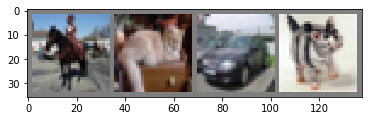

horse  cat  car  cat


In [7]:
def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

#Get a random example:
dataiter=iter(trainloader)
images, labels= dataiter.next()

#Print image:
imshow(torchvision.utils.make_grid(images))
#Print labels:
print(''.join('%5s' % classes[labels[j]] for j in range(4)))


## Define a Convolutional Neural Network

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1= nn.Conv2d(3,6,5)
        self.pool= nn.MaxPool2d(2,2)
        self.conv2= nn.Conv2d(6,16,5)
        self.fc1= nn.Linear(16*5*5,120)
        self.fc2= nn.Linear(120, 84)
        self.fc3= nn.Linear(84,10)
    def forward(self, x):
        x= self.pool(F.relu(self.conv1(x)))
        x= self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
        
net=Net()

## Loss function and optimizer

In [12]:
#Loss function Classification Cross-Entropy
#Optimizer: Stocastic Gradient Descent and 
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Train the network

In [13]:
for epoch in range(2):
    running_loss=0.0
    for i, data in enumerate(trainloader, 0):
        #data is a list of [inputs, labels]
        inputs, labels= data
        
        #zero the parameter gradients
        optimizer.zero_grad()
        
        #forward+backward+optimize
        outputs=net(inputs)
        loss=criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #print statistics
        running_loss+= loss.item()
        if i % 2000 == 1999: #print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch +1, i+1, running_loss/2000))
            running_loss=0.0

print('Finished Training')
        
        

[1,  2000] loss: 2.199
[1,  4000] loss: 1.874
[1,  6000] loss: 1.724
[1,  8000] loss: 1.584
[1, 10000] loss: 1.537
[1, 12000] loss: 1.471
[2,  2000] loss: 1.407
[2,  4000] loss: 1.381
[2,  6000] loss: 1.356
[2,  8000] loss: 1.334
[2, 10000] loss: 1.298
[2, 12000] loss: 1.300
Finished Training


## Save the trained model

In [16]:
path='./trained_model'
torch.save(net.state_dict(), path)